In [1]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
matplotlib.rc('font',family='NanumGothic')
df_member=pd.read_csv("./master_member_sheet_000.csv")
df_log=pd.read_csv("./log_order_sheet_001.csv")

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys
/home/piai/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df_member.columns

Index(['ID', '나이', '사용가능 적립금', '성별', '주소(동/읍/면)', '최종접속일', '최종주문일', '유입경로', '유입기기', '회원 가입일', '사업자구분', '회원구분'], dtype='object')

In [3]:
df_member.isnull().sum()

ID           0   
나이           0   
사용가능 적립금     0   
성별           0   
주소(동/읍/면)    634 
최종접속일        52  
최종주문일        1422
유입경로         0   
유입기기         0   
회원 가입일       0   
사업자구분        0   
회원구분         0   
dtype: int64

In [4]:
df_member["주소(동/읍/면)"]=df_member["주소(동/읍/면)"].fillna("주소없음")


In [5]:
df_member.isnull().sum()

ID           0   
나이           0   
사용가능 적립금     0   
성별           0   
주소(동/읍/면)    0   
최종접속일        52  
최종주문일        1422
유입경로         0   
유입기기         0   
회원 가입일       0   
사업자구분        0   
회원구분         0   
dtype: int64

In [6]:
df_member=df_member.dropna(subset=["최종접속일"])

In [7]:
df_member.isnull().sum()

ID           0   
나이           0   
사용가능 적립금     0   
성별           0   
주소(동/읍/면)    0   
최종접속일        0   
최종주문일        1370
유입경로         0   
유입기기         0   
회원 가입일       0   
사업자구분        0   
회원구분         0   
dtype: int64

In [8]:
df_member["최종주문일"]=df_member["최종주문일"].fillna(df_member["회원 가입일"])

In [9]:
df_member.isnull().sum()

ID           0
나이           0
사용가능 적립금     0
성별           0
주소(동/읍/면)    0
최종접속일        0
최종주문일        0
유입경로         0
유입기기         0
회원 가입일       0
사업자구분        0
회원구분         0
dtype: int64

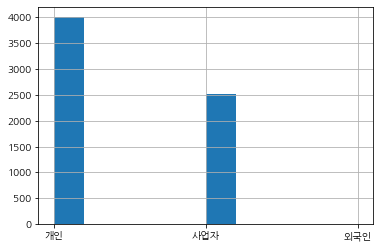

In [10]:
df_member["사업자구분"].unique()
df_member["사업자구분"].hist()

In [11]:
df_member["사업자구분"]=df_member["사업자구분"].apply(lambda x: "개인" if x=="외국인" else x)

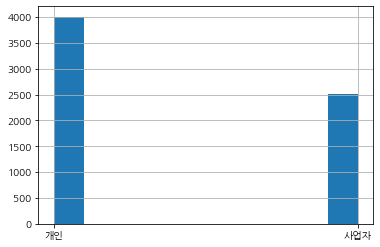

In [12]:
df_member["사업자구분"].unique()
df_member["사업자구분"].hist()

In [13]:
df_member.drop(['회원구분'],axis=1)

,ID,나이,사용가능 적립금,성별,주소(동/읍/면),최종접속일,최종주문일,유입경로,유입기기,회원 가입일,사업자구분
0,sr7577,45,0,남자,경기도 평택시 현신3길 76 (용이동),2016-12-30 오후 5:57,2016-12-30,블로그광고,PC,2016-12-30,개인
1,cgh1385,53,0,남자,전라북도 전주시 덕진구 동부대로 879 (호성동1가),2017-01-02 오후 12:32,2017-01-01 오후 3:38,블로그광고,모바일,2017-01-01,개인
2,pjkl77,28,0,남자,전라북도 전주시 완산구 효자동3가 1676-13,2017-02-26 오후 10:52,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,사업자
3,aabb8482,44,0,여자,충청남도 아산시 용화고길 46 (용화동),2017-01-23 오후 6:25,2017-01-17,블로그광고,PC,2017-01-17,사업자
4,bear011,40,21908,남자,경기도 부천시 원미구 상일로 126 (상동),2018-12-19 오후 1:26,2018-12-19 오후 1:29,SNS광고,모바일,2017-01-17,사업자
...,...,...,...,...,...,...,...,...,...,...,...
6570,pp1730,31,1000,남자,경기도 의정부시 동일로454번길 40 (신곡동),2019-05-31 오후 4:38,2019-05-31 오후 4:30,유튜브광고,PC,2019-05-31,개인
6571,jsuee8228,45,1000,남자,경상북도 구미시 산호대로29길 7-7 (옥계동),2019-06-21 오후 9:38,2019-06-05,전단지광고,PC,2019-06-05,사업자
6572,aaok0204,47,1000,남자,경상남도 창원시 의창구 북면 무동로267번길 10,2019-06-12 오후 7:59,2019-06-12,인터넷검색,모바일,2019-06-12,사업자
6573,aaok02044,46,1000,남자,경상남도 창원시 의창구 북면 무동로267번길 10,2019-06-19 오전 10:59,2019-06-19 오전 11:18,인터넷검색,모바일,2019-06-19,사업자


In [14]:
# df_member.loc[(df_member["나이"]>=10) & (df_member["나이"]<20),'나이']="10대"
# df_member.loc[(df_member["나이"]>=20) & (df_member["나이"]<30),'나이']="20대"
# df_member.loc[(df_member["나이"]>=30) & (df_member["나이"]<40),'나이']="30대"
# df_member.loc[(df_member["나이"]>=40) & (df_member["나이"]<50),'나이']="40대"
# df_member.loc[(df_member["나이"]>=50) & (df_member["나이"]<60),'나이']="50대"


In [15]:
bins=[10,20,30,40,50,60,70,80,90,100]
labels=["10대","20대","30대","40대","50대","60대","70대","80대","90대"]
df_member["나이"]=pd.cut(df_member["나이"],bins,labels=labels)

In [16]:
df_member

,ID,나이,사용가능 적립금,성별,주소(동/읍/면),최종접속일,최종주문일,유입경로,유입기기,회원 가입일,사업자구분,회원구분
0,sr7577,40대,0,남자,경기도 평택시 현신3길 76 (용이동),2016-12-30 오후 5:57,2016-12-30,블로그광고,PC,2016-12-30,개인,일반
1,cgh1385,50대,0,남자,전라북도 전주시 덕진구 동부대로 879 (호성동1가),2017-01-02 오후 12:32,2017-01-01 오후 3:38,블로그광고,모바일,2017-01-01,개인,일반
2,pjkl77,20대,0,남자,전라북도 전주시 완산구 효자동3가 1676-13,2017-02-26 오후 10:52,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,사업자,사업자
3,aabb8482,40대,0,여자,충청남도 아산시 용화고길 46 (용화동),2017-01-23 오후 6:25,2017-01-17,블로그광고,PC,2017-01-17,사업자,사업자
4,bear011,30대,21908,남자,경기도 부천시 원미구 상일로 126 (상동),2018-12-19 오후 1:26,2018-12-19 오후 1:29,SNS광고,모바일,2017-01-17,사업자,사업자
...,...,...,...,...,...,...,...,...,...,...,...,...
6570,pp1730,30대,1000,남자,경기도 의정부시 동일로454번길 40 (신곡동),2019-05-31 오후 4:38,2019-05-31 오후 4:30,유튜브광고,PC,2019-05-31,개인,전화주문 고객
6571,jsuee8228,40대,1000,남자,경상북도 구미시 산호대로29길 7-7 (옥계동),2019-06-21 오후 9:38,2019-06-05,전단지광고,PC,2019-06-05,사업자,일반
6572,aaok0204,40대,1000,남자,경상남도 창원시 의창구 북면 무동로267번길 10,2019-06-12 오후 7:59,2019-06-12,인터넷검색,모바일,2019-06-12,사업자,일반
6573,aaok02044,40대,1000,남자,경상남도 창원시 의창구 북면 무동로267번길 10,2019-06-19 오전 10:59,2019-06-19 오전 11:18,인터넷검색,모바일,2019-06-19,사업자,일반


In [17]:
#df_member.to_csv('master_member_sheet_001.csv')

In [18]:
df_member['최종접속일(월별)']=df_member['최종접속일'].str.slice(start=0,stop=7)
df_member['최종주문일(월별)']=df_member['최종주문일'].str.slice(start=0,stop=7)

In [19]:
df_member.columns

Index(['ID', '나이', '사용가능 적립금', '성별', '주소(동/읍/면)', '최종접속일', '최종주문일', '유입경로', '유입기기', '회원 가입일', '사업자구분', '회원구분', '최종접속일(월별)', '최종주문일(월별)'], dtype='object')

In [20]:
df_member

,ID,나이,사용가능 적립금,성별,주소(동/읍/면),최종접속일,최종주문일,유입경로,유입기기,회원 가입일,사업자구분,회원구분,최종접속일(월별),최종주문일(월별)
0,sr7577,40대,0,남자,경기도 평택시 현신3길 76 (용이동),2016-12-30 오후 5:57,2016-12-30,블로그광고,PC,2016-12-30,개인,일반,2016-12,2016-12
1,cgh1385,50대,0,남자,전라북도 전주시 덕진구 동부대로 879 (호성동1가),2017-01-02 오후 12:32,2017-01-01 오후 3:38,블로그광고,모바일,2017-01-01,개인,일반,2017-01,2017-01
2,pjkl77,20대,0,남자,전라북도 전주시 완산구 효자동3가 1676-13,2017-02-26 오후 10:52,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,사업자,사업자,2017-02,2017-02
3,aabb8482,40대,0,여자,충청남도 아산시 용화고길 46 (용화동),2017-01-23 오후 6:25,2017-01-17,블로그광고,PC,2017-01-17,사업자,사업자,2017-01,2017-01
4,bear011,30대,21908,남자,경기도 부천시 원미구 상일로 126 (상동),2018-12-19 오후 1:26,2018-12-19 오후 1:29,SNS광고,모바일,2017-01-17,사업자,사업자,2018-12,2018-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6570,pp1730,30대,1000,남자,경기도 의정부시 동일로454번길 40 (신곡동),2019-05-31 오후 4:38,2019-05-31 오후 4:30,유튜브광고,PC,2019-05-31,개인,전화주문 고객,2019-05,2019-05
6571,jsuee8228,40대,1000,남자,경상북도 구미시 산호대로29길 7-7 (옥계동),2019-06-21 오후 9:38,2019-06-05,전단지광고,PC,2019-06-05,사업자,일반,2019-06,2019-06
6572,aaok0204,40대,1000,남자,경상남도 창원시 의창구 북면 무동로267번길 10,2019-06-12 오후 7:59,2019-06-12,인터넷검색,모바일,2019-06-12,사업자,일반,2019-06,2019-06
6573,aaok02044,40대,1000,남자,경상남도 창원시 의창구 북면 무동로267번길 10,2019-06-19 오전 10:59,2019-06-19 오전 11:18,인터넷검색,모바일,2019-06-19,사업자,일반,2019-06,2019-06


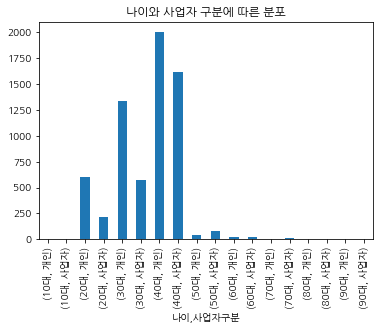

In [21]:
df_member_total=df_member.groupby(["나이","사업자구분"]).size()
ax=df_member_total.plot(kind='bar',title="나이와 사업자 구분에 따른 분포")
plt.show()

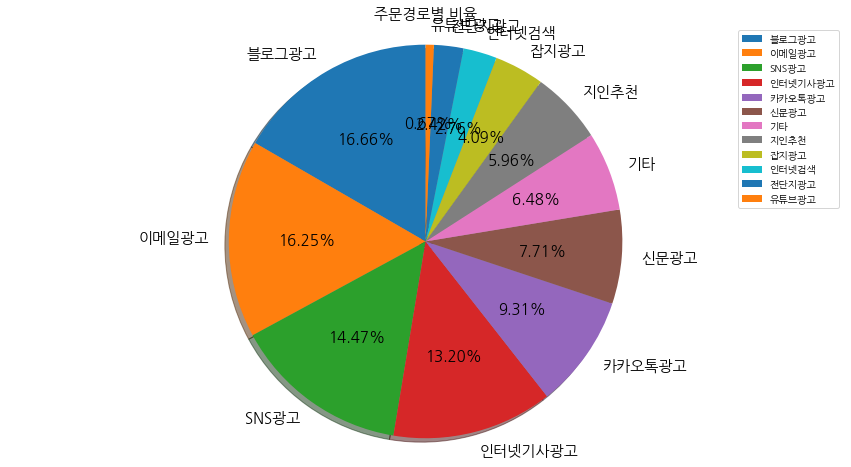

In [22]:
plt.rcParams["figure.figsize"] = (15,8)

group_colors=['yellowgreen','lightskyblue','lightcoral']
group_explodes=(0.1,0,0)
plt.pie(df_member['유입경로'].value_counts(),
        labels=df_member['유입경로'].unique(),
        autopct='%1.2f%%',
        shadow=True,
        startangle=90,
       textprops={'fontsize':15})
plt.axis('equal')
plt.legend(df_member['유입경로'].unique())
plt.title('주문경로별 비율',fontsize=15)
plt.show()

In [23]:
df_member.columns

Index(['ID', '나이', '사용가능 적립금', '성별', '주소(동/읍/면)', '최종접속일', '최종주문일', '유입경로', '유입기기', '회원 가입일', '사업자구분', '회원구분', '최종접속일(월별)', '최종주문일(월별)'], dtype='object')

In [24]:
df_log.columns


Index(['Unnamed: 0', '결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수령인 주소', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가', '품목번호', '친환경', '사은품', '회원', '주문수량', '총수량'], dtype='object')

In [25]:
df_log['영업이익']=df_log['상품구매금액']-df_log['상품별 추가할인금액']-df_log['공급원가']-df_log['사용한 적립금액']-df_log['쿠폰 할인금액']

In [26]:
df_log.head()

,Unnamed: 0,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,상품명,상품번호,상품별 추가할인금액,수령인 주소,주문경로,주문번호,주문일시,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호,친환경,사은품,회원,주문수량,총수량,영업이익
0,0,무통장입금,44550.0,교환안함,0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,71450,195파이 탕용기 소 300개 1set(2박스),1077,13600,경상남도 거제시 능포로 168-1 (능포동),PC쇼핑몰,20181227-0000648,2018-12-27 오후 2:54,pp683,기타,0,71450,42602,False,False,True,1,300,13300.0
1,1,무통장입금,44000.0,교환안함,0,D-20181229-0000119-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,141240,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",42,19800,서울특별시 동대문구 한천로36길 16 (장안동),모바일웹,20181229-0000119,2018-12-29 오후 1:22,asd0908,기타,0,70620,42930,False,False,True,2,2000,77440.0
2,2,무통장입금,6820.0,교환안함,0,D-20181230-0000100-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,13910,비닐봉투 배달중 중 백색 200개,1271,2900,세종특별자치시 호려울로 29 (보람동),모바일웹,20181230-0000100,2018-12-30 오후 3:15,NaN,기타,0,13910,42998,False,False,False,1,200,4190.0
3,3,무통장입금,49500.0,교환안함,0,D-20181231-0000087-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,81600,195파이 미니탕용기 투톤 300개 1set(2박스),1085,12630,부산광역시 부산진구 가야대로 482 (개금동),모바일웹,20181231-0000087,2018-12-31 오전 10:30,23533593@n,기타,0,81600,43063,False,False,True,1,300,19470.0
4,4,무통장입금,61600.0,교환안함,0,D-20181231-0000108-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,94710,250파이 원형 접시 미니 블랙 400개 1박스,1106,18000,부산광역시 해운대구 선수촌로 104-21 (반여동),모바일웹,20181231-0000108,2018-12-31 오전 10:43,romandoll,기타,0,94710,43066,False,False,True,1,400,15110.0


In [27]:
df_log=df_log.rename({'주문자ID':'ID'},axis='columns')

In [28]:
df_log.head()

,Unnamed: 0,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,상품명,상품번호,상품별 추가할인금액,수령인 주소,주문경로,주문번호,주문일시,ID,카드사,쿠폰 할인금액,판매가,품목번호,친환경,사은품,회원,주문수량,총수량,영업이익
0,0,무통장입금,44550.0,교환안함,0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,71450,195파이 탕용기 소 300개 1set(2박스),1077,13600,경상남도 거제시 능포로 168-1 (능포동),PC쇼핑몰,20181227-0000648,2018-12-27 오후 2:54,pp683,기타,0,71450,42602,False,False,True,1,300,13300.0
1,1,무통장입금,44000.0,교환안함,0,D-20181229-0000119-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,141240,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",42,19800,서울특별시 동대문구 한천로36길 16 (장안동),모바일웹,20181229-0000119,2018-12-29 오후 1:22,asd0908,기타,0,70620,42930,False,False,True,2,2000,77440.0
2,2,무통장입금,6820.0,교환안함,0,D-20181230-0000100-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,13910,비닐봉투 배달중 중 백색 200개,1271,2900,세종특별자치시 호려울로 29 (보람동),모바일웹,20181230-0000100,2018-12-30 오후 3:15,NaN,기타,0,13910,42998,False,False,False,1,200,4190.0
3,3,무통장입금,49500.0,교환안함,0,D-20181231-0000087-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,81600,195파이 미니탕용기 투톤 300개 1set(2박스),1085,12630,부산광역시 부산진구 가야대로 482 (개금동),모바일웹,20181231-0000087,2018-12-31 오전 10:30,23533593@n,기타,0,81600,43063,False,False,True,1,300,19470.0
4,4,무통장입금,61600.0,교환안함,0,D-20181231-0000108-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,94710,250파이 원형 접시 미니 블랙 400개 1박스,1106,18000,부산광역시 해운대구 선수촌로 104-21 (반여동),모바일웹,20181231-0000108,2018-12-31 오전 10:43,romandoll,기타,0,94710,43066,False,False,True,1,400,15110.0


In [30]:
df_member.head()

,ID,나이,사용가능 적립금,성별,주소(동/읍/면),최종접속일,최종주문일,유입경로,유입기기,회원 가입일,사업자구분,회원구분,최종접속일(월별),최종주문일(월별)
0,sr7577,40대,0,남자,경기도 평택시 현신3길 76 (용이동),2016-12-30 오후 5:57,2016-12-30,블로그광고,PC,2016-12-30,개인,일반,2016-12,2016-12
1,cgh1385,50대,0,남자,전라북도 전주시 덕진구 동부대로 879 (호성동1가),2017-01-02 오후 12:32,2017-01-01 오후 3:38,블로그광고,모바일,2017-01-01,개인,일반,2017-01,2017-01
2,pjkl77,20대,0,남자,전라북도 전주시 완산구 효자동3가 1676-13,2017-02-26 오후 10:52,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,사업자,사업자,2017-02,2017-02
3,aabb8482,40대,0,여자,충청남도 아산시 용화고길 46 (용화동),2017-01-23 오후 6:25,2017-01-17,블로그광고,PC,2017-01-17,사업자,사업자,2017-01,2017-01
4,bear011,30대,21908,남자,경기도 부천시 원미구 상일로 126 (상동),2018-12-19 오후 1:26,2018-12-19 오후 1:29,SNS광고,모바일,2017-01-17,사업자,사업자,2018-12,2018-12


In [31]:
df_join=pd.merge(df_log,df_member,how='outer')

In [32]:
df_join

,Unnamed: 0,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,상품명,상품번호,상품별 추가할인금액,수령인 주소,주문경로,주문번호,주문일시,ID,카드사,쿠폰 할인금액,판매가,품목번호,친환경,사은품,회원,주문수량,총수량,영업이익,나이,사용가능 적립금,성별,주소(동/읍/면),최종접속일,최종주문일,유입경로,유입기기,회원 가입일,사업자구분,회원구분,최종접속일(월별),최종주문일(월별)
0,0.0,무통장입금,44550.0,교환안함,0.0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0.0,71450.0,195파이 탕용기 소 300개 1set(2박스),1077,13600.0,경상남도 거제시 능포로 168-1 (능포동),PC쇼핑몰,20181227-0000648,2018-12-27 오후 2:54,pp683,기타,0.0,71450.0,42602.0,False,False,True,1.0,300.0,13300.0,30대,0.0,남자,경상남도 거제시 능포로 168-1 (능포동),2019-05-20 오후 1:48,2019-05-20 오후 1:52,이메일광고,PC,2018-08-21,개인,전화주문 고객,2019-05,2019-05
1,5699.0,무통장입금,37400.0,교환안함,0.0,D-20190222-0000607-00,무료,2019-02-26 오전 9:01,2019-03-02 오전 5:32,0.0,49700.0,PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기),455,0.0,경상남도 거제시 능포로 168-1 (능포동),PC쇼핑몰,20190222-0000607,2019-02-22 오후 4:16,pp683,기타,0.0,49700.0,55570.0,False,False,True,1.0,200.0,12300.0,30대,0.0,남자,경상남도 거제시 능포로 168-1 (능포동),2019-05-20 오후 1:48,2019-05-20 오후 1:52,이메일광고,PC,2018-08-21,개인,전화주문 고객,2019-05,2019-05
2,5700.0,무통장입금,71500.0,교환안함,0.0,D-20190222-0000607-01,무료,2019-02-26 오전 9:01,2019-03-02 오전 5:32,0.0,91620.0,사각 죽용기 소 550ml 500개 1set(2박스),88,0.0,경상남도 거제시 능포로 168-1 (능포동),PC쇼핑몰,20190222-0000607,2019-02-22 오후 4:16,pp683,기타,0.0,91620.0,55571.0,False,False,True,1.0,500.0,20120.0,30대,0.0,남자,경상남도 거제시 능포로 168-1 (능포동),2019-05-20 오후 1:48,2019-05-20 오후 1:52,이메일광고,PC,2018-08-21,개인,전화주문 고객,2019-05,2019-05
3,8785.0,무통장입금,77440.0,교환안함,0.0,D-20190319-0000818-00,무료,2019-03-21 오전 9:02,2019-03-25 오전 5:32,0.0,102680.0,반찬용기 204-2 2칸 투명 800개 1set(2박스),1223,0.0,경상남도 거제시 능포로 168-1 (능포동),PC쇼핑몰,20190319-0000818,2019-03-19 오후 4:27,pp683,기타,0.0,102680.0,61933.0,False,False,True,1.0,800.0,25240.0,30대,0.0,남자,경상남도 거제시 능포로 168-1 (능포동),2019-05-20 오후 1:48,2019-05-20 오후 1:52,이메일광고,PC,2018-08-21,개인,전화주문 고객,2019-05,2019-05
4,9886.0,무통장입금,37400.0,교환안함,0.0,D-20190329-0000072-00,무료,2019-04-01 오전 9:25,2019-04-05 오전 5:32,0.0,99400.0,PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기),455,0.0,경상남도 거제시 능포로 168-1 (능포동),PC쇼핑몰,20190329-0000072,2019-03-29 오전 9:32,pp683,기타,0.0,49700.0,64319.0,False,False,True,2.0,400.0,62000.0,30대,0.0,남자,경상남도 거제시 능포로 168-1 (능포동),2019-05-20 오후 1:48,2019-05-20 오후 1:52,이메일광고,PC,2018-08-21,개인,전화주문 고객,2019-05,2019-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wjdtnsghhh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40대,1000.0,남자,강원도 원주시 호저면 만종리 597,2019-05-30 오전 10:15,2019-05-30,전단지광고,PC,2019-05-30,사업자,일반,2019-05,2019-05
48324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102452849@n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40대,1000.0,남자,주소없음,2019-05-31 오후 12:52,2019-05-31,블로그광고,PC,2019-05-31,개인,일반,2019-05,2019-05
48325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jsuee8228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40대,1000.0,남자,경상북도 구미시 산호대로29길 7-7 (옥계동),2019-06-21 오후 9:38,2019-06-05,전단지광고,PC,2019-06-05,사업자,일반,2019-06,2019-06
48326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aaok0204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40대,1000.0,남자,경상남도 창원시 의창구 북면 무동로267번길 10,2019-06-12 오후 7:59,2019-06-12,인터넷검색,모바일,2019-06-12,사업자,일반,2019-06,2019-06


In [33]:
df_join.dropna(subset=['ID'])

,Unnamed: 0,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,상품명,상품번호,상품별 추가할인금액,수령인 주소,주문경로,주문번호,주문일시,ID,카드사,쿠폰 할인금액,판매가,품목번호,친환경,사은품,회원,주문수량,총수량,영업이익,나이,사용가능 적립금,성별,주소(동/읍/면),최종접속일,최종주문일,유입경로,유입기기,회원 가입일,사업자구분,회원구분,최종접속일(월별),최종주문일(월별)
0,0.0,무통장입금,44550.0,교환안함,0.0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0.0,71450.0,195파이 탕용기 소 300개 1set(2박스),1077,13600.0,경상남도 거제시 능포로 168-1 (능포동),PC쇼핑몰,20181227-0000648,2018-12-27 오후 2:54,pp683,기타,0.0,71450.0,42602.0,False,False,True,1.0,300.0,13300.0,30대,0.0,남자,경상남도 거제시 능포로 168-1 (능포동),2019-05-20 오후 1:48,2019-05-20 오후 1:52,이메일광고,PC,2018-08-21,개인,전화주문 고객,2019-05,2019-05
1,5699.0,무통장입금,37400.0,교환안함,0.0,D-20190222-0000607-00,무료,2019-02-26 오전 9:01,2019-03-02 오전 5:32,0.0,49700.0,PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기),455,0.0,경상남도 거제시 능포로 168-1 (능포동),PC쇼핑몰,20190222-0000607,2019-02-22 오후 4:16,pp683,기타,0.0,49700.0,55570.0,False,False,True,1.0,200.0,12300.0,30대,0.0,남자,경상남도 거제시 능포로 168-1 (능포동),2019-05-20 오후 1:48,2019-05-20 오후 1:52,이메일광고,PC,2018-08-21,개인,전화주문 고객,2019-05,2019-05
2,5700.0,무통장입금,71500.0,교환안함,0.0,D-20190222-0000607-01,무료,2019-02-26 오전 9:01,2019-03-02 오전 5:32,0.0,91620.0,사각 죽용기 소 550ml 500개 1set(2박스),88,0.0,경상남도 거제시 능포로 168-1 (능포동),PC쇼핑몰,20190222-0000607,2019-02-22 오후 4:16,pp683,기타,0.0,91620.0,55571.0,False,False,True,1.0,500.0,20120.0,30대,0.0,남자,경상남도 거제시 능포로 168-1 (능포동),2019-05-20 오후 1:48,2019-05-20 오후 1:52,이메일광고,PC,2018-08-21,개인,전화주문 고객,2019-05,2019-05
3,8785.0,무통장입금,77440.0,교환안함,0.0,D-20190319-0000818-00,무료,2019-03-21 오전 9:02,2019-03-25 오전 5:32,0.0,102680.0,반찬용기 204-2 2칸 투명 800개 1set(2박스),1223,0.0,경상남도 거제시 능포로 168-1 (능포동),PC쇼핑몰,20190319-0000818,2019-03-19 오후 4:27,pp683,기타,0.0,102680.0,61933.0,False,False,True,1.0,800.0,25240.0,30대,0.0,남자,경상남도 거제시 능포로 168-1 (능포동),2019-05-20 오후 1:48,2019-05-20 오후 1:52,이메일광고,PC,2018-08-21,개인,전화주문 고객,2019-05,2019-05
4,9886.0,무통장입금,37400.0,교환안함,0.0,D-20190329-0000072-00,무료,2019-04-01 오전 9:25,2019-04-05 오전 5:32,0.0,99400.0,PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기),455,0.0,경상남도 거제시 능포로 168-1 (능포동),PC쇼핑몰,20190329-0000072,2019-03-29 오전 9:32,pp683,기타,0.0,49700.0,64319.0,False,False,True,2.0,400.0,62000.0,30대,0.0,남자,경상남도 거제시 능포로 168-1 (능포동),2019-05-20 오후 1:48,2019-05-20 오후 1:52,이메일광고,PC,2018-08-21,개인,전화주문 고객,2019-05,2019-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wjdtnsghhh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40대,1000.0,남자,강원도 원주시 호저면 만종리 597,2019-05-30 오전 10:15,2019-05-30,전단지광고,PC,2019-05-30,사업자,일반,2019-05,2019-05
48324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102452849@n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40대,1000.0,남자,주소없음,2019-05-31 오후 12:52,2019-05-31,블로그광고,PC,2019-05-31,개인,일반,2019-05,2019-05
48325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jsuee8228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40대,1000.0,남자,경상북도 구미시 산호대로29길 7-7 (옥계동),2019-06-21 오후 9:38,2019-06-05,전단지광고,PC,2019-06-05,사업자,일반,2019-06,2019-06
48326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aaok0204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40대,1000.0,남자,경상남도 창원시 의창구 북면 무동로267번길 10,2019-06-12 오후 7:59,2019-06-12,인터넷검색,모바일,2019-06-12,사업자,일반,2019-06,2019-06


In [35]:
df_join.dropna()

,Unnamed: 0,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,상품명,상품번호,상품별 추가할인금액,수령인 주소,주문경로,주문번호,주문일시,ID,카드사,쿠폰 할인금액,판매가,품목번호,친환경,사은품,회원,주문수량,총수량,영업이익,나이,사용가능 적립금,성별,주소(동/읍/면),최종접속일,최종주문일,유입경로,유입기기,회원 가입일,사업자구분,회원구분,최종접속일(월별),최종주문일(월별)
0,0.0,무통장입금,44550.0,교환안함,0.0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0.0,71450.0,195파이 탕용기 소 300개 1set(2박스),1077,13600.0,경상남도 거제시 능포로 168-1 (능포동),PC쇼핑몰,20181227-0000648,2018-12-27 오후 2:54,pp683,기타,0.0,71450.0,42602.0,False,False,True,1.0,300.0,13300.0,30대,0.0,남자,경상남도 거제시 능포로 168-1 (능포동),2019-05-20 오후 1:48,2019-05-20 오후 1:52,이메일광고,PC,2018-08-21,개인,전화주문 고객,2019-05,2019-05
1,5699.0,무통장입금,37400.0,교환안함,0.0,D-20190222-0000607-00,무료,2019-02-26 오전 9:01,2019-03-02 오전 5:32,0.0,49700.0,PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기),455,0.0,경상남도 거제시 능포로 168-1 (능포동),PC쇼핑몰,20190222-0000607,2019-02-22 오후 4:16,pp683,기타,0.0,49700.0,55570.0,False,False,True,1.0,200.0,12300.0,30대,0.0,남자,경상남도 거제시 능포로 168-1 (능포동),2019-05-20 오후 1:48,2019-05-20 오후 1:52,이메일광고,PC,2018-08-21,개인,전화주문 고객,2019-05,2019-05
2,5700.0,무통장입금,71500.0,교환안함,0.0,D-20190222-0000607-01,무료,2019-02-26 오전 9:01,2019-03-02 오전 5:32,0.0,91620.0,사각 죽용기 소 550ml 500개 1set(2박스),88,0.0,경상남도 거제시 능포로 168-1 (능포동),PC쇼핑몰,20190222-0000607,2019-02-22 오후 4:16,pp683,기타,0.0,91620.0,55571.0,False,False,True,1.0,500.0,20120.0,30대,0.0,남자,경상남도 거제시 능포로 168-1 (능포동),2019-05-20 오후 1:48,2019-05-20 오후 1:52,이메일광고,PC,2018-08-21,개인,전화주문 고객,2019-05,2019-05
3,8785.0,무통장입금,77440.0,교환안함,0.0,D-20190319-0000818-00,무료,2019-03-21 오전 9:02,2019-03-25 오전 5:32,0.0,102680.0,반찬용기 204-2 2칸 투명 800개 1set(2박스),1223,0.0,경상남도 거제시 능포로 168-1 (능포동),PC쇼핑몰,20190319-0000818,2019-03-19 오후 4:27,pp683,기타,0.0,102680.0,61933.0,False,False,True,1.0,800.0,25240.0,30대,0.0,남자,경상남도 거제시 능포로 168-1 (능포동),2019-05-20 오후 1:48,2019-05-20 오후 1:52,이메일광고,PC,2018-08-21,개인,전화주문 고객,2019-05,2019-05
4,9886.0,무통장입금,37400.0,교환안함,0.0,D-20190329-0000072-00,무료,2019-04-01 오전 9:25,2019-04-05 오전 5:32,0.0,99400.0,PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기),455,0.0,경상남도 거제시 능포로 168-1 (능포동),PC쇼핑몰,20190329-0000072,2019-03-29 오전 9:32,pp683,기타,0.0,49700.0,64319.0,False,False,True,2.0,400.0,62000.0,30대,0.0,남자,경상남도 거제시 능포로 168-1 (능포동),2019-05-20 오후 1:48,2019-05-20 오후 1:52,이메일광고,PC,2018-08-21,개인,전화주문 고객,2019-05,2019-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46744,46716.0,무통장입금,49500.0,교환안함,0.0,D-20171227-0000055-00,무료,2017-12-27 오후 4:46,2017-12-31 오전 5:36,0.0,79200.0,195파이 미니탕용기 블랙 300개 1set(2박스),603.0,11880.0,충청북도 충주시 문화동 879,모바일웹,20171227-0000055,2017-12-27 오전 11:59,dkek6666,기타,0.0,79200.0,3123.0,False,False,True,1.0,300.0,17820.0,40대,0.0,남자,충청북도 충주시 문화동 879,2018-03-20 오전 11:14,2017-12-27 오전 11:59,SNS광고,모바일,2017-12-27,개인,일반,2018-03,2017-12
46745,46717.0,무통장입금,1910.0,교환안함,0.0,D-20171227-0000055-00,무료,2017-12-27 오후 4:46,2017-12-31 오전 5:36,0.0,0.0,스폰지 양면 수세미(2개),534.0,0.0,충청북도 충주시 문화동 879,모바일웹,20171227-0000055,2017-12-27 오전 11:59,dkek6666,기타,0.0,0.0,3124.0,False,False,True,1.0,2.0,-1910.0,40대,0.0,남자,충청북도 충주시 문화동 879,2018-03-20 오전 11:14,2017-12-27 오전 11:59,SNS광고,모바일,2017-12-27,개인,일반,2018-03,2017-12
46746,46742.0,무통장입금,56100.0,교환안함,0.0,D-20171229-0000026-00,무료,2017-12-29 오후 4:32,2018-01-02 오전 5:31,0.0,86240.0,125파이 원형용기 대 450ml 백색 PP 600개 1set(2박스),478.0,12940.0,전라북도 익산시 하나로10길 58-5 (부송동),모바일웹,20171229-0000026,2017-12-29 오후 12:05,sarbia,기타,0.0,86240.0,3168.0,False,False,True,1.0,600.0,17200.0,40대,1460.0,남자,전라북도 익산시 하나로10길 58-5 (부송동),2018-01-07 오후 6:59,2017-12-29 오후 12:05,SNS광고,모바일,2017-12-29,사업자,사업자,2018-01,2017-12
46747,46743.0,무통장입금,1910.0,교환안함,0.0,D-20171229-0000026-00,무료,2017-12-29 오후 4:32,2018-01-02 오전 5:31,0.0,0.0,스폰지 양면 수세미(2개),534.0,0.0,전라북도 익산시 하나로10길 58-5 (부송동),모바일웹,20171229-0000026,2017-12-29 오후 12:05,sarbia,기타,0.0,0.0,3169.0,False,False,True,1.0,2.0,-1910.0,40대,1460.0,남자,전라북도 익산시 하나로10길 58-5 (부송동),2018-01-07 오후 6:59,2017-12-29 오후 12:05,SNS광고,모바일,2017-12-29,사업자,사업자,2018-01,2017-12
